<a href="https://colab.research.google.com/github/Shibu4064/Thesis_Final/blob/main/EDA_fakenews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
fake=pd.read_excel('/content/Panda (2).xlsx')
fake.head()
fake.shape
fake

,Headline,Content
0,শেখ হাসিনা বিশ্বের সবচেয়ে নিকৃষ্ট প্রধানমন্ত্...,"গুজবের উৎপত্তি মে ৩০, ২০১৮ তারিখে rpolitician...."
1,শিশুর শরীরে হঠাৎ করে গজাচ্ছে ‘পশুর’ লোম?,গুজবের উৎপত্তি বিগত কয়েক মাস ধরে সময়সময়ে এই...
2,বিসিবি না চাইলেও ‘বিদায়’ জানিয়ে দিলেন সাকিব?,গুজবের উৎপত্তি আগস্টের ২০ তারিখে Songrami71 না...
3,সিলেটে পুলিশ কর্মকর্তার বাড়ি থেকে পুঁতে রাখা ১...,গুজবের উৎপত্তি আগস্ট ২১ তারিখে একাধিক বেনামী ন...
4,ক্লাব পরিবর্তন করে পিএসজিতে যাচ্ছেন ক্রিস্টিয়া...,গুজবের উৎপত্তি আগস্ট ১২ তারিখে একাধিক ফেসবুক প...
...,...,...
1034,ফুলবাড়ীতে কৃষক প্রশিক্ষণ অনুষ্ঠিত ***,"মোস্তাফিজার রহমান (জাহাঙ্গীর) ফুলবাড়ী, কুড়িগ..."
1035,"করোনায় ১৭ জনের মৃত্যু, নতুন শনাক্ত ১,৮৪২ জন ***",স্বাধীনবাংলা. ডেস্ক রির্পোটঃ নভেল করোনাভাইরাসে...
1036,তৃতীয় লিঙ্গের মানুষের জন্য প্রথম শিক্ষা প্রতি...,"স্বাধীনবাংলা, ডেস্ক রির্পোটঃ হিজড়া জনগোষ্ঠীর ..."
1037,আজ থেকে ঢাকায় প্রতিদিন বিদ্যুৎ থাকবে না আট ঘণ্...,"স্বাধীনবাংলা, ডেস্ক নিউজঃ আজ থেকে ৩০ নভেম্বর প..."


In [3]:
import matplotlib.pyplot as plt

def show_bar(column, title, top=100):
  plt.figure(figsize=(20,5))
  column[:top].plot(kind='bar')
  plt.title(title)
  plt.xlabel("ID")
  plt.ylabel("Count")
  plt.show()


import seaborn as sns

def show_dist(column):
  plt.figure(figsize=(10,5))
  sns.distplot(column)
  plt.show()

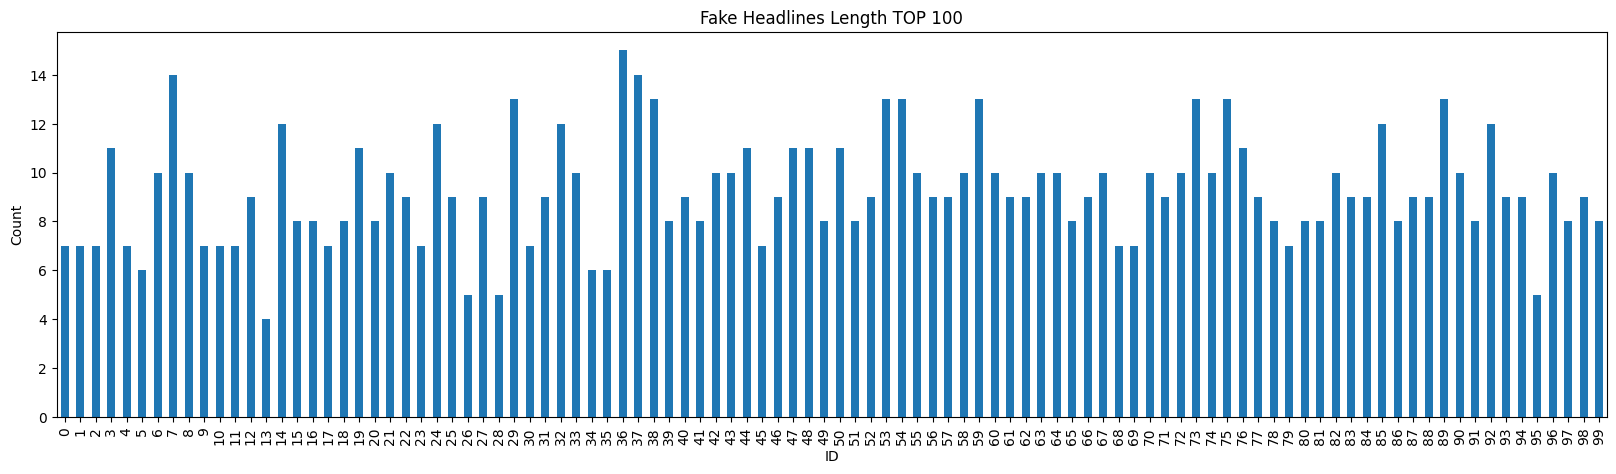

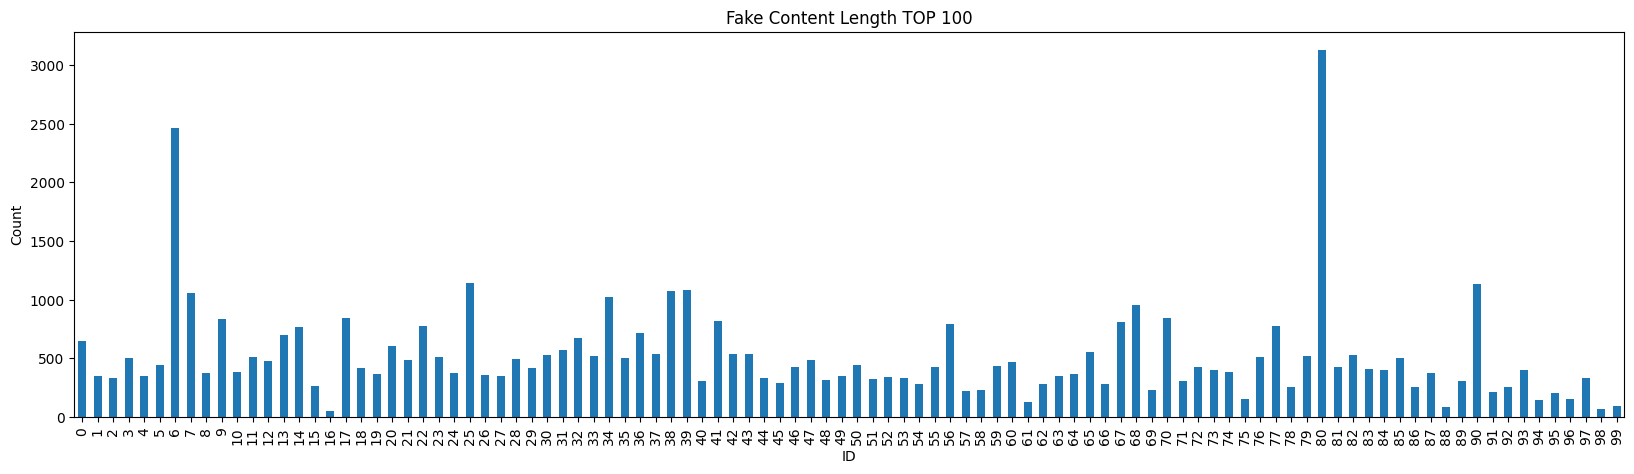

In [4]:
fake['head_lenght'] = fake.Headline.apply(lambda x : len(x.split()))
fake['content_head_lenght'] = fake.Content.apply(lambda x : len(x.split()))

show_bar(fake.head_lenght, "Fake Headlines Length TOP 100")
print("")
show_bar(fake.content_head_lenght, "Fake Content Length TOP 100")

<ipython-input-3-0115600331fe>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(column)


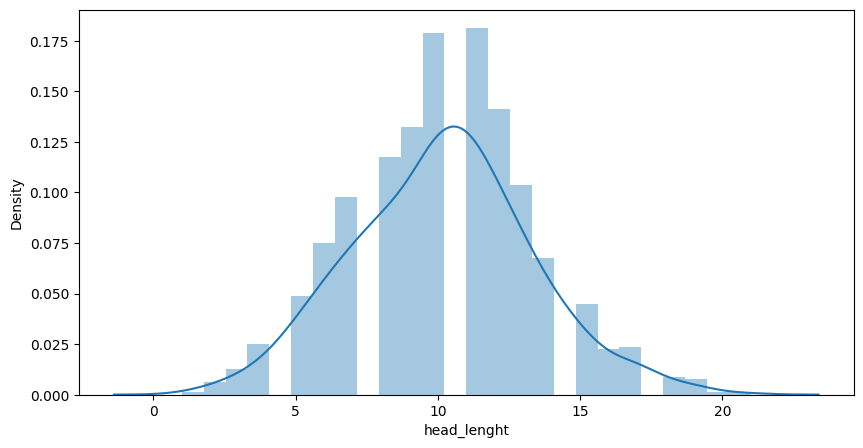

<ipython-input-3-0115600331fe>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(column)


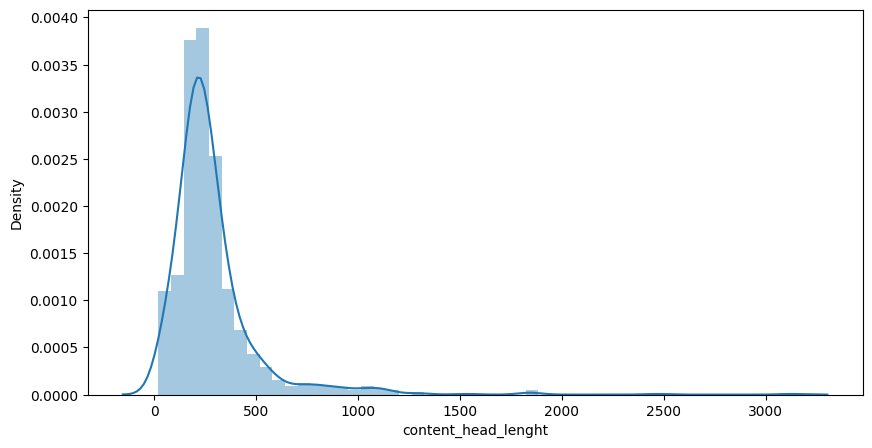

In [5]:
show_dist(fake.head_lenght)
print("")
show_dist(fake.content_head_lenght)

In [6]:
!wget https://www.easynepalityping.com/resource/font/bangla/06-nikosh-bangla-font.zip

--2023-10-06 19:27:26--  https://www.easynepalityping.com/resource/font/bangla/06-nikosh-bangla-font.zip
Resolving www.easynepalityping.com (www.easynepalityping.com)... 172.67.165.83, 104.21.11.66, 2606:4700:3035::ac43:a553, ...
Connecting to www.easynepalityping.com (www.easynepalityping.com)|172.67.165.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 317905 (310K) [application/zip]
Saving to: ‘06-nikosh-bangla-font.zip’

06-nikosh-bangla-fo 100%[===================>] 310.45K  --.-KB/s    in 0.03s   

2023-10-06 19:27:26 (8.93 MB/s) - ‘06-nikosh-bangla-font.zip’ saved [317905/317905]



In [7]:
!unzip 06-nikosh-bangla-font.zip

Archive:  06-nikosh-bangla-font.zip
  inflating: Nikosh.ttf              


In [8]:
from wordcloud import WordCloud, STOPWORDS

def plot_world(text):

    wordcloud = WordCloud(width = 500, height = 500,
                    background_color ='black',
                    font_path="/content/Nikosh.ttf",
                    min_font_size = 10).generate(text)

    # plot the WordCloud image
    plt.figure(figsize = (5, 5), facecolor = 'k', edgecolor = 'k' )
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

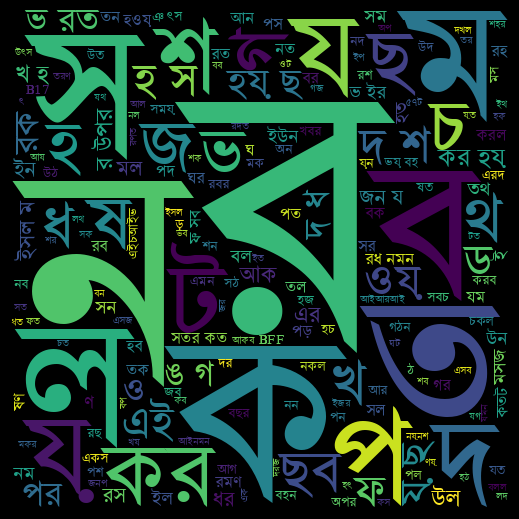

In [9]:
s= " ".join(fake.Headline[:100])
plot_world(s)

In [10]:
!pip install bnlp

  Preparing metadata (setup.py) ... done
  Created wheel for bnlp: filename=bnlp-0.8-py3-none-any.whl size=32803 sha256=f9d813f37ec29cb282f364fc001112b5653c7a59e1f47d33c16e6b4c72d49e2b
  Stored in directory: /root/.cache/pip/wheels/64/c7/7e/272284eb8c800fbb5306bdf7904ae9f99a64812fc615f471b2
Successfully built bnlp


In [11]:
!pip install stop-words

  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32896 sha256=d0d678bab417207ad68d002f65fb5e428a6626bc3862ab7870042dd37e559384
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop-words


In [12]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words_bengali = stopwords.words('bengali')

print(stop_words_bengali)

['অতএব', 'অথচ', 'অথবা', 'অনুযায়ী', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অন্য', 'অবধি', 'অবশ্য', 'অর্থাত', 'আই', 'আগামী', 'আগে', 'আগেই', 'আছে', 'আজ', 'আদ্যভাগে', 'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'ই', 'ইত্যাদি', 'ইহা', 'উচিত', 'উত্তর', 'উনি', 'উপর', 'উপরে', 'এ', 'এঁদের', 'এঁরা', 'এই', 'একই', 'একটি', 'একবার', 'একে', 'এক্', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটা', 'এটাই', 'এটি', 'এত', 'এতটাই', 'এতে', 'এদের', 'এব', 'এবং', 'এবার', 'এমন', 'এমনকী', 'এমনি', 'এর', 'এরা', 'এল', 'এস', 'এসে', 'ঐ', 'ও', 'ওঁদের', 'ওঁর', 'ওঁরা', 'ওই', 'ওকে', 'ওখানে', 'ওদের', 'ওর', 'ওরা', 'কখনও', 'কত', 'কবে', 'কমনে', 'কয়েক', 'কয়েকটি', 'করছে', 'করছেন', 'করতে', 'করবে', 'করবেন', 'করলে', 'করলেন', 'করা', 'করাই', 'করায়', 'করার', 'করি', 'করিতে', 'করিয়া', 'করিয়ে', 'করে', 'করেই', 'করেছিলেন', 'করেছে', 'করেছেন', 'করেন', 'কাউকে', 'কাছ', 'কাছে', 'কাজ', 'কাজে', 'কারও', 'কারণ', 'কি', 'কিংবা', 'কিছু', 'কিছুই', 'কিন্তু', 'কী', 'কে', 'কেউ', 'কেউই', 'কেখা', 'কেন', 'কোটি', 'কোন', 'কোনও'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
from collections import defaultdict
from collections import  Counter
# from bnlp.corpus import stopwords
from nltk.corpus import stopwords
stop_words_bengali = stopwords.words('bengali')
import matplotlib.font_manager as fm


def show_stop_words(corpus, length=20):
  dic = defaultdict(int)

  for word in corpus:
      if word in stop_words_bengali:
          dic[word]+=1

  top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:length]
  x,y=zip(*top)
  print(x)
  print(y)
  plt.figure(figsize=(10,5))
  plt.bar(x,y)
  plt.show()